In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sb 
from pandas import Series,DataFrame
from numpy.random import randn 
from matplotlib import rcParams 
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession

get_ipython().run_line_magic('matplotlib', 'inline')
rcParams['figure.figsize']=10,10
sb.set_style('whitegrid')
warnings.filterwarnings("ignore")

# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)

add = 'C:\WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(add)

In [156]:
data['is_train'] = np.random.uniform(0, 1, len(data)) <= .65

In [157]:
train, test = data[data['is_train']==True], data[data['is_train']==False]

In [158]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 982
Number of observations in the test data: 488


In [159]:
train_att_f = pd.factorize(train['Attrition'])[0]
test_att_f = pd.factorize(test['Attrition'])[0]

In [160]:
train_att_f

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [161]:
test_att_f

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [162]:
train['BusinessTravel'] = pd.factorize(train['BusinessTravel'])[0]
train['Department'] = pd.factorize(train['Department'])[0]
train['EducationField'] = pd.factorize(train['EducationField'])[0]
train['Gender'] = pd.factorize(train['Gender'])[0]
train['JobRole'] = pd.factorize(train['JobRole'])[0]
train['MaritalStatus'] = pd.factorize(train['MaritalStatus'])[0]
train['OverTime'] = pd.factorize(train['OverTime'])[0]

train = train.drop(['Attrition'],axis=1)
train = train.drop(['Over18'],axis=1)
train = train.drop(['is_train'],axis=1)
train = train.drop(['StandardHours'],axis=1)
train = train.drop(['EmployeeCount'],axis=1)                                             

test['BusinessTravel'] = pd.factorize(test['BusinessTravel'])[0]
test['Department'] = pd.factorize(test['Department'])[0]
test['EducationField'] = pd.factorize(test['EducationField'])[0]
test['Gender'] = pd.factorize(test['Gender'])[0]
test['JobRole'] = pd.factorize(test['JobRole'])[0]
test['MaritalStatus'] = pd.factorize(test['MaritalStatus'])[0]
test['OverTime'] = pd.factorize(test['OverTime'])[0]

test = test.drop(['Attrition'],axis=1)
test = test.drop(['Over18'],axis=1)
test = test.drop(['is_train'],axis=1)
test = test.drop(['StandardHours'],axis=1) 
test = test.drop(['EmployeeCount'],axis=1) 

In [175]:
train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,0,1,2,0,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,0,2,3,1,...,4,4,1,10,3,3,10,7,1,7
4,27,0,591,1,2,1,1,7,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,1,1005,1,2,2,0,8,4,1,...,3,3,0,8,2,2,7,7,3,6
6,59,0,1324,1,3,3,1,10,3,0,...,4,1,3,12,3,2,1,0,0,0


In [176]:
test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,0,1373,0,2,2,0,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,0,3,4,1,5,4,1,...,3,3,0,8,3,3,8,7,3,0
10,35,0,809,0,16,3,2,14,1,0,...,3,3,1,6,5,3,5,4,0,3
12,31,0,670,0,26,1,1,16,1,0,...,3,4,1,5,1,2,5,2,4,3
14,28,0,103,0,24,3,1,19,3,0,...,3,2,0,6,4,3,4,2,0,3


In [164]:
features = train.columns[:]
features

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [352]:
clf = RandomForestClassifier(n_estimators=100 ,n_jobs= 1, random_state=5, oob_score = True , warm_start = True)
clf.fit(train[features], train_att_f)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=5, verbose=0, warm_start=True)

In [353]:
final = clf.predict(test[features])
final

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [354]:
pd.crosstab(test_att_f, final, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,10,73
1,0,405


In [355]:
list(zip(train[features], clf.feature_importances_))


[('Age', 0.05928631222078274),
 ('BusinessTravel', 0.014055582810960714),
 ('DailyRate', 0.053984284942536875),
 ('Department', 0.011821308183229693),
 ('DistanceFromHome', 0.03927349366216058),
 ('Education', 0.01793908791427265),
 ('EducationField', 0.025489049416623583),
 ('EmployeeNumber', 0.048427212322438115),
 ('EnvironmentSatisfaction', 0.03180561066501454),
 ('Gender', 0.008564284057670022),
 ('HourlyRate', 0.04773312296380052),
 ('JobInvolvement', 0.0252795761198996),
 ('JobLevel', 0.018298862609084605),
 ('JobRole', 0.02867559505905195),
 ('JobSatisfaction', 0.025169141648413745),
 ('MaritalStatus', 0.022374188776372178),
 ('MonthlyIncome', 0.07249155187151732),
 ('MonthlyRate', 0.05217635628023576),
 ('NumCompaniesWorked', 0.038622062501137415),
 ('OverTime', 0.0527172788196468),
 ('PercentSalaryHike', 0.03322043736116554),
 ('PerformanceRating', 0.006559787386159537),
 ('RelationshipSatisfaction', 0.02319035932923963),
 ('StockOptionLevel', 0.03167096721442985),
 ('TotalWo

In [356]:
from sklearn.metrics import accuracy_score

In [357]:
accuracy_score(test_att_f,final)*100

85.04098360655738

In [358]:
rcParams['figure.figsize']=15,15

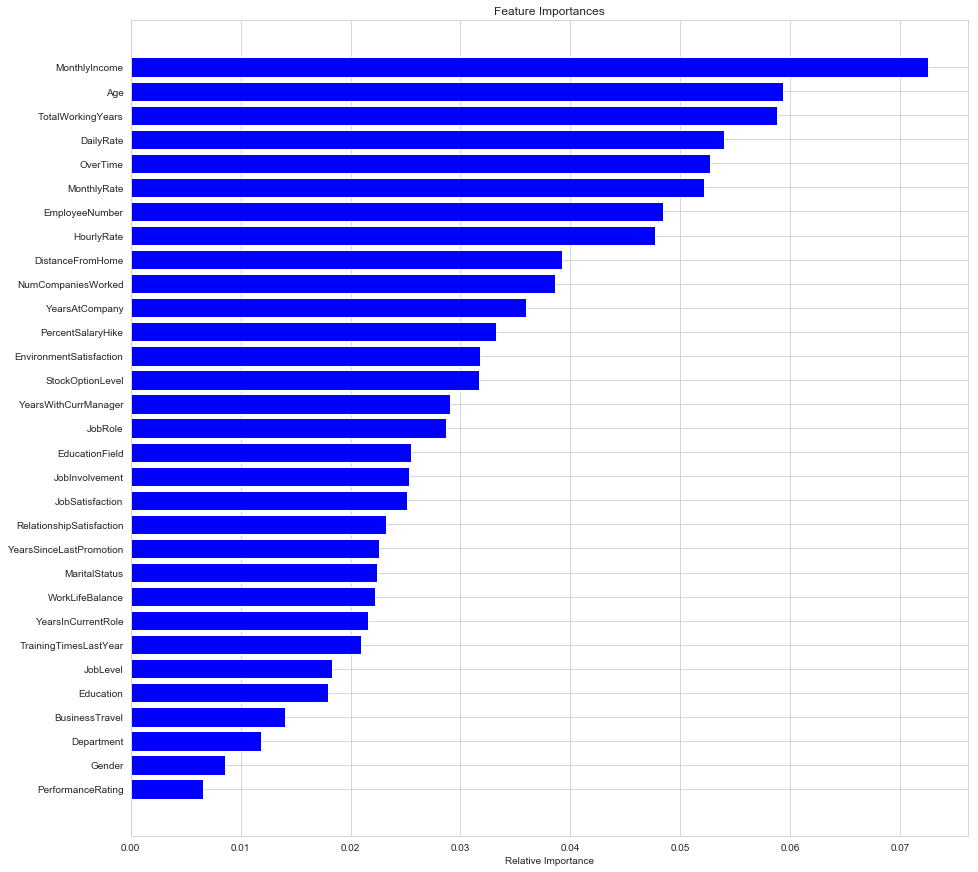

In [359]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()